## Условие задания:
### Дано:
f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30
### Необходимо:
1. Определить корни.
2. Найти интервалы на которых функция возрастает.
3. Найти интервалы на которых функция убывает.
4. Построить график.
5. Вычислить вершину.
6. Определить промежутки, на которых f(x) > 0
7. Определить промежутки, на которых f(x) < 0

### Доп. условие:
Так как данная функция имеет бесконечное количество корней (см. п. 1 решения) все задачи будут выполняться на отрезке х ∈ [—10, 10]!


## Решение
### 1. Найдем общий график функции

In [294]:
from sympy import *
from sympy.plotting import plot
from sympy import Interval, symbols, solveset
from sympy.calculus.util import *
from sympy import abc
from numpy import arange
from numpy import cos, sin
from scipy import optimize
from scipy.optimize import differential_evolution
init_printing()


In [289]:
def function(x):
    return -12*sin(cos(x))*x**4 - 18*x**3+5*x**2 + 10*x - 30

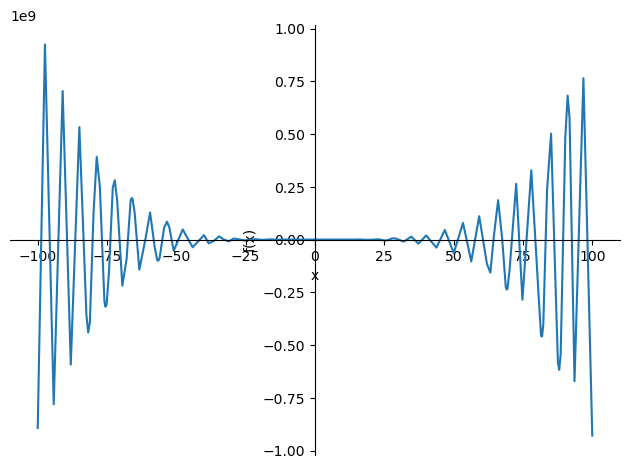

-12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30


In [290]:
x = Symbol('x', real=True)
f = -12*sin(cos(x))*x**4 - 18*x**3+5*x**2 + 10*x - 30
plot(f,(x,-100,100))
print(f)



#### Из графика выше понятно, что функция является немонотонной и имеет бесконечное количество корней, поэтому выведем график при х ∈ [—10, 10].
#### Визуальный анализ показывает, что здесь как минимум 4 корня.

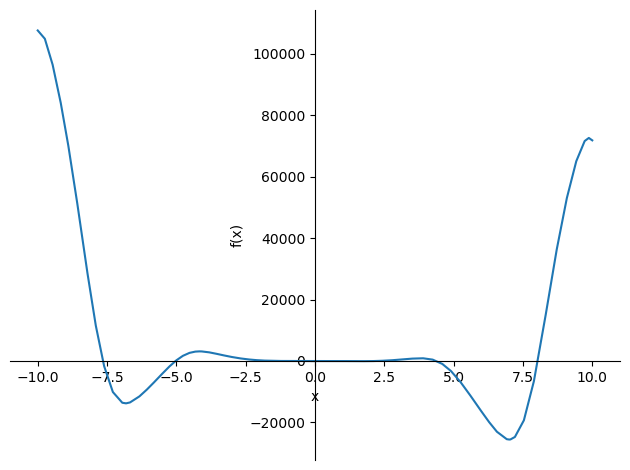

-12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30


In [291]:
plot(f,(x,-10,10))
print(f)


#### Найдем точное количество корней:

In [283]:
qtyXres = 0
tempXres = function(-10)
for i in arange (-10, 10, 0.001):
    if tempXres * function(i) < 0: qtyXres += 1
    tempXres = function(i)
print(f"Общее кол-во корней = {qtyXres}")


Общее кол-во корней = 6


### 2. Поиск корней
#### По вычислениям выше общее кол-во корней = 6.
#### Находим каждый корень перебором, до тех пор пока функция не преодолеет 0, затем уточняем полученное значение с помощью функции nsolve()

In [292]:
def funcRootResult(minX, maxX, step):
    tempDifferense = 0
    if function(minX) - function(minX + step) < 0:
        for i in arange (minX, maxX, step):
            if function(i) > tempDifferense: 
                nearestX = i
                message = f"Функция возрастает!\nx = {i} => f(x) = {function(i)}\nf(x) = 0 при x = {nsolve(f, nearestX)}"
                return message
    if function(minX) - function(minX + step) > 0:
        for i in arange (minX, maxX, step):
            if function(i) < tempDifferense: 
                nearestX = i
                message = f"Функция убывает!\nx = {i} => f(x) = {function(i)}\nf(x) = 0 при x = {nsolve(f, nearestX)}"
                return message
       
    
    


#### Поиск корня x1:
#### Ответ: f(x) = 0 при x = -7.65062228513275 

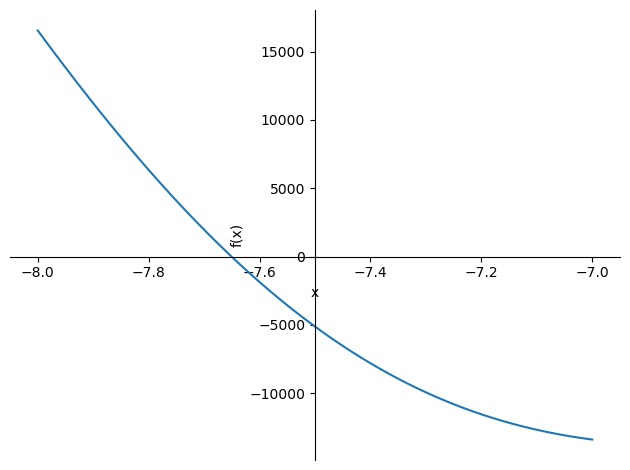

-12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30
Функция убывает!
x = -7.65062000000187 => f(x) = -0.0876621130482391
f(x) = 0 при x = -7.65062228513275


In [105]:
plot(f,(x,-8,-7))
print(f)
print(funcRootResult(-7.7, -7.6, 0.00001))

#### Поиск корня x2:
#### Ответ: f(x) = 0 при x = -5.02686592820621

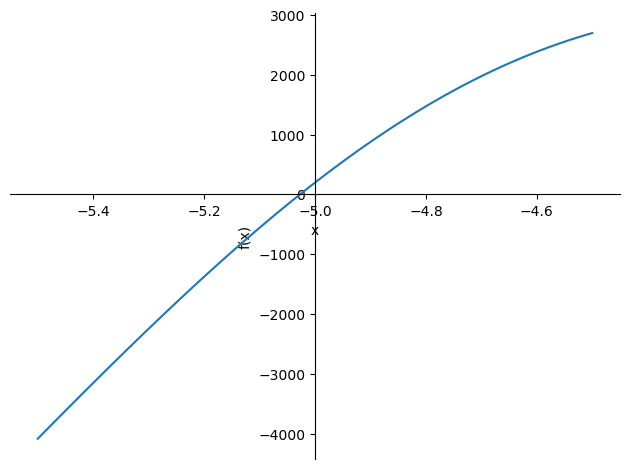

-12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30
Функция возрастает!
x = -5.026860000002769 => f(x) = 0.0438220023861220
f(x) = 0 при x = -5.02686592820621


In [84]:
plot(f,(x,-5.5,-4.5))
print(f)
print(funcRootResult(-5.1, -4.9, 0.00001))

#### Поиск корня x3:
#### Ответ: f(x) = 0 при x = -1.33896663927711

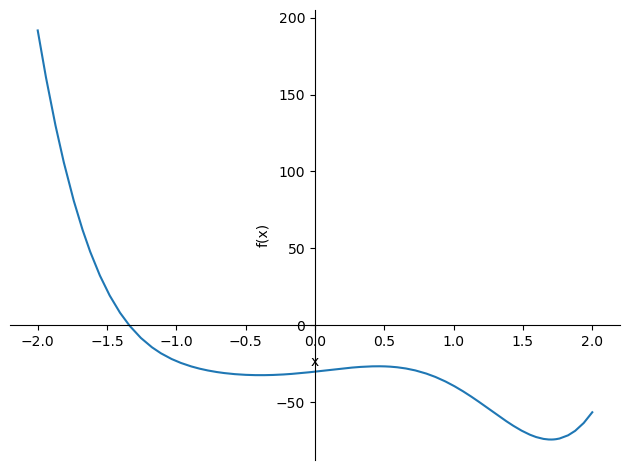

-12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30
Функция убывает!
x = -1.338959999998945 => f(x) = -0.000733721380150598
f(x) = 0 при x = -1.33896663927711


In [85]:
plot(f,(x,-2,2))
print(f)
print(funcRootResult(-1.5, -1.3, 0.00001))

#### Поиск корня x4:
#### Ответ: f(x) = 0 при x = 2.27305684575625

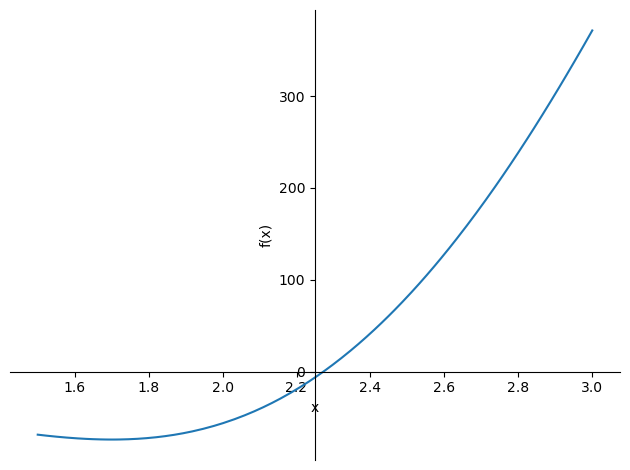

-12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30
Функция возрастает!
x = 2.273060000000479 => f(x) = 0.000909509824197130
f(x) = 0 при x = 2.27305684575625


In [109]:
plot(f,(x,1.5,3))
print(f)
print(funcRootResult(2.2, 2.3, 0.00001))

#### Поиск корня x5:
#### Ответ: f(x) = 0 при x = 4.38352369796896

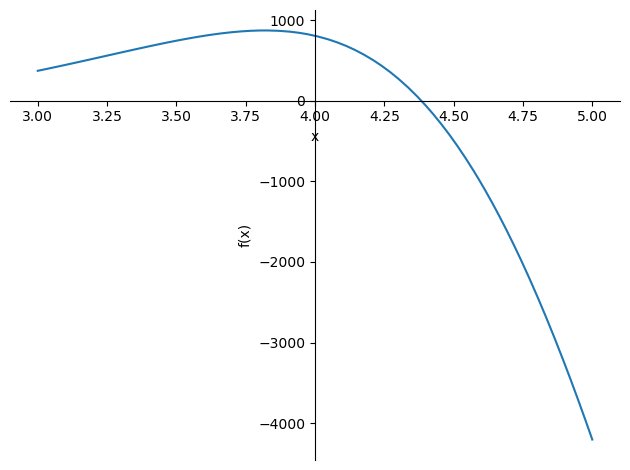

-12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30
Функция убывает!
x = 4.38352999999873 => f(x) = -0.0231731259884640
f(x) = 0 при x = 4.38352369796896


In [87]:
plot(f,(x,3,5))
print(f)
print(funcRootResult(4.35, 4.4, 0.00001))

#### Поиск корня x6:
#### Ответ: f(x) = 0 при x = 8.03516413341352

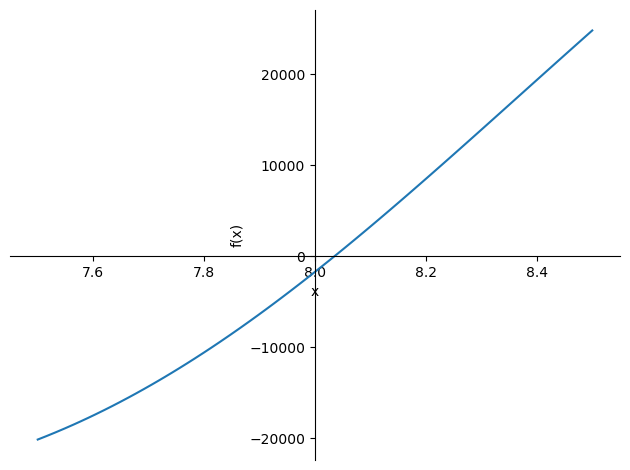

-12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30
Функция возрастает!
x = 8.035169999998669 => f(x) = 0.290239321712306
f(x) = 0 при x = 8.03516413341352


In [169]:
plot(f,(x,7.5,8.5))
print(f)
print(funcRootResult(8, 8.1, 0.00001))

### 2. ОТВЕТ:
#### Всего 6 решений f(0) на отрезке х ∈ [—10, 10].
 - x1 = -7.65062228513275
 - x2 = -5.02686592820621
 - x3 = -1.33896663927711
 - x4 = 2.27305684575625
 - x5 = 4.38352369796896
 - x6 = 8.03516413341352

### 3. Поиск вершин
#### По вычислениям выше общее кол-во корней = 6 и известны их значения.
#### Зная график и кол-во корней, можно предположить, что количество вершин (учитывая перечения с OX) =5

#### Так как функция является довольно пологой вблизи начала отчета координат, для точного подсчета вершин предлается сжать функцию, умножив все ее коэффициенты на 5.

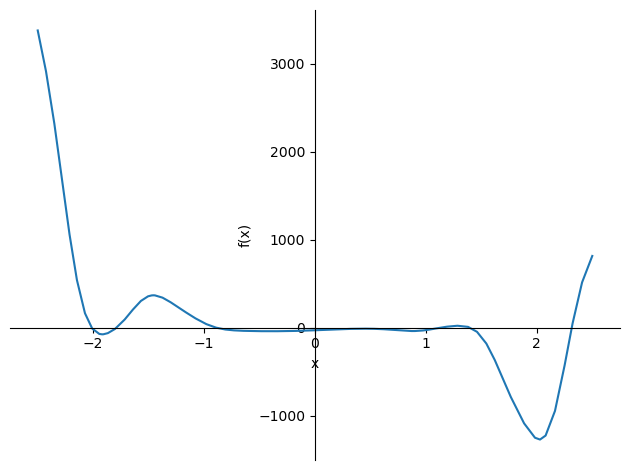

60*x**4*sin(cos(5*x)) - 90*x**3 + 25*x**2 + 50*x - 30


In [256]:
ftemp = 5*12*sin(cos(5*x))*x**4 - 5*18*x**3+5*5*x**2 + 5*10*x - 30
plot(ftemp,(x,-2.5,2.5))
print(ftemp)

#### Уточним количество вершин:
##### Если выполнить код ниже с разным шагом, то с его уменьшением количество корней увеличивается. Видимо в промежутке от -1 до 1 у нее присутсвуют колебания, не заметные на графике. Поэтому считаю целесообразным найти хотя бы вершины, соответсвующие участкам функции, пересекающим ОХ

In [295]:
def functionTemp(x):
    return 60*x**4*sin(cos(5*x)) - 90*x**3 + 25*x**2 + 50*x - 30

qtyExtr = 0
check = true
## Кусок кода ниже фактически считает сколько раз функция поменяла свое направление.
for i in arange (-2.5, 2.5, 0.025):
    tempRes = functionTemp(i + 0.025)
    tempY = functionTemp(i)
    if check == true:
        if tempY - tempRes > 0: 
            continue
        else: 
            check == false
            ## print(f"{tempY} < {tempRes}")
            qtyExtr += 1 
            continue
    if check == false:
        if tempY - tempRes < 0: 
            continue
        else:
            check == true
            ## print(f"{tempY} > {tempRes}")
            qtyExtr += 1
            continue
    
print(f"Общее кол-во вершин = {qtyExtr}")



Общее кол-во вершин = 89


#### Найдем одни из вершин:

In [305]:
def extrFuncValue (func, bMin, bMax):
    bounds = [(bMin, bMax)]
    extrFuncValue = differential_evolution(func, bounds)
    return (extrFuncValue.x,extrFuncValue.fun)

print("Найдены следующие вершины:")
res = extrFuncValue(function, -7, -5) ##границы между x1 и x2 (примерно)
print(f"A ({res[0][0]}, {res[1]})")
res = extrFuncValue(lambda x:-function(x), -5,-1) ##границы между x2 и x3 (примерно)
print(f"B ({res[0][0]}, {res[1] * -1})")
res = extrFuncValue(function, -1, 2) ##границы между x3 и x4 (примерно)
print(f"С ({res[0][0]}, {res[1]})")
res = extrFuncValue(lambda x:-function(x), 2,4) ##границы между x4 и x5 (примерно)
print(f"D ({res[0][0]}, {res[1] * -1})")
res = extrFuncValue(function, 4, 8) ##границы между x5 и x6 (примерно)
print(f"E ({res[0][0]}, {res[1]})")


Найдены следующие вершины:
A (-6.8313694021473355, -13820.534926467413)
B (-4.167783530421969, 3111.363238735963)
С (1.7006072713193556, -74.1062930861087)
D (3.8193108255086323, 872.2557702910614)
E (7.001031659787006, -25610.50968103302)


### 3. ОТВЕТ:
#### Как минимум 5 вершин на отрезке х ∈ [—10, 10].
 - A (-6.831370038454139, -13820.534926472736)
 - B (-4.167783527804093, 3111.3632387359617)
 - С (1.7006072772607506, -74.10629308610872)
 - D (3.819310836467525, -872.2557702910613)
 - E (7.001031654138797, -25610.50968103302)

### 4. Поиск интервалов возрастания и убывания функции:
#### Зная данные ранее можно предположить, что на заданном интервале, существуюет как минимум 6 интервалов

### 4. ОТВЕТ:
#### Как минимум 6 интервалов возрастания/убывания ф-ции на отрезке х ∈ [—10, 10].
 - Убывает при x ∈ [-10, -6,83..]
 - Возрастает при x ∈ [-6,83.., -4,17..]
 - Убывает при x ∈ [-4,17.., 1,7..]
 - Возрастает при x ∈ [1,7.., 3,82..]
 - Убывает при x ∈ [3,82.., 7,001..]
 - Возрастает при x ∈ [7,001.., 9,5]


### 5. Промежутки при которых f(x) > 0 или f(x) < 0 :

### 5. ОТВЕТ:
#### Как минимум 7 промежутков на отрезке х ∈ [—10, 10].
##### f(x) > 0 на промежутках:
 - x ∈ [-10, -7,65..]
 - x ∈ [-5,03.., -1.34..]
 - x ∈ [2,27.., 4,38..]
 - x ∈ [8,04.., 9,5..]
##### f(x) < 0 на промежутках:
 - x ∈ [-7,65.., -5,03..]
 - x ∈ [-1.34.., 2,27..]
 - x ∈ [4,38.., 8,04..]